<a href="https://colab.research.google.com/github/shemzegem200/Stock-Price-Prediction/blob/main/ml_cat1_assgmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction - ML task**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, time

#Install Yahoo Finance Libraries
try:
  import yfinance
except:
  !pip install -q yfinance
  import yfinance

try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials
  import yahoofinancials

import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")

# Download historical data for Tesla (TSLA)
df = yf.download('TSLA',
                 start='2000-01-01',
                 end=date.today(),
                 progress=False,)

df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [ ]:
import yfinance as yf
# Download historical data for Tesla (TSLA)
data = yf.download("TSLA", start="2018-01-01", end="2023-01-01")
data.to_csv("tesla_stock_data.csv")  # Save to CSV
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2018-01-02  21.368668  21.474001  20.733334  20.799999   65283000
2018-01-03  21.150000  21.683332  21.036667  21.400000   67822500
2018-01-04  20.974667  21.236668  20.378668  20.858000  149194500
2018-01-05  21.105333  21.149332  20.799999  21.108000   68868000
2018-01-08  22.427334  22.468000  21.033333  21.066668  147891000


## **Exploratory Data Analysis**
1. Load the dataset.
2. Analyze trends, moving averages, and volatility.
3. Visualize key metrics.

In [ ]:
# Load dataset
data = pd.read_csv("tesla_stock_data.csv")
print(data.columns);

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("tesla_stock_data.csv")

# Display basic info
print(data.info())
print(data.describe())

# Set Seaborn style
sns.set_style("darkgrid")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1261 non-null   object
 1   Close   1260 non-null   object
 2   High    1260 non-null   object
 3   Low     1260 non-null   object
 4   Open    1260 non-null   object
 5   Volume  1260 non-null   object
dtypes: object(6)
memory usage: 59.2+ KB
None
         Price              Close                High                 Low  \
count     1261               1260                1260                1260   
unique    1261               1248                1224                1237   
top     Ticker  194.6999969482422  21.496000289916992  21.766666412353516   
freq         1                  2                   3                   3   

        Open     Volume  
count   1260       1260  
unique  1233       1255  
top     24.0  119925000  
freq       4          2  


## **Plots:**

In [ ]:
# Ensure numeric columns are handled properly
df = df.dropna()  # Remove missing values

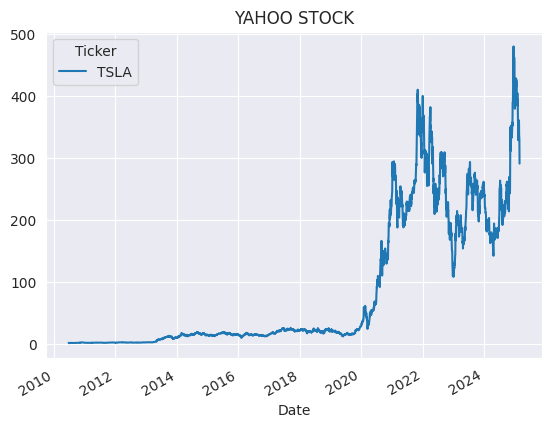

In [ ]:
#Create a simple chart
df.plot(y='Close', title='YAHOO STOCK')
plt.show()

In [ ]:
!pip install pandas-ta

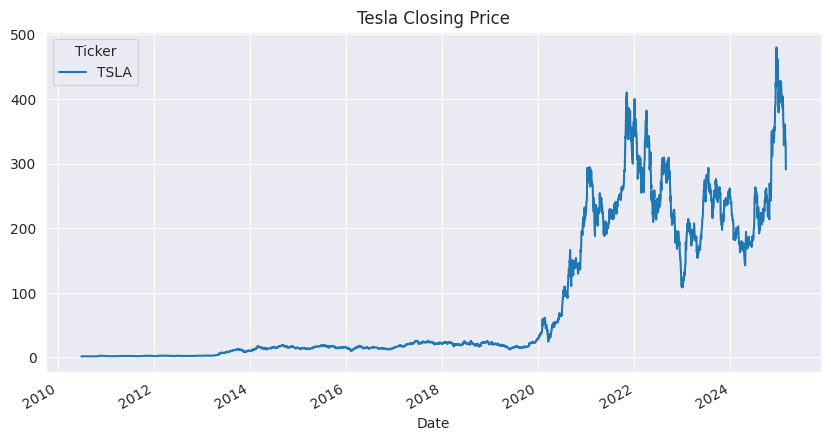

In [ ]:
# Plot Closing Price
df.plot(y='Close', title='Tesla Closing Price', figsize=(10, 5))
plt.show()

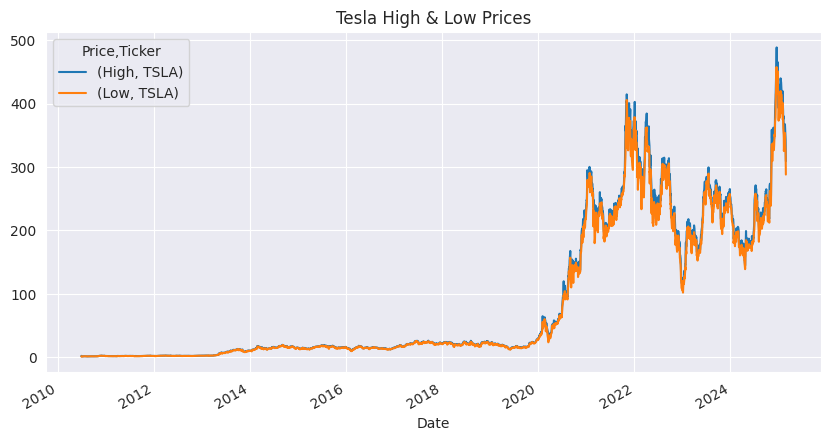

In [ ]:
# Plot High and Low Prices on the Same Graph
df.plot(y=['High', 'Low'], title='Tesla High & Low Prices', figsize=(10, 5))
plt.show()

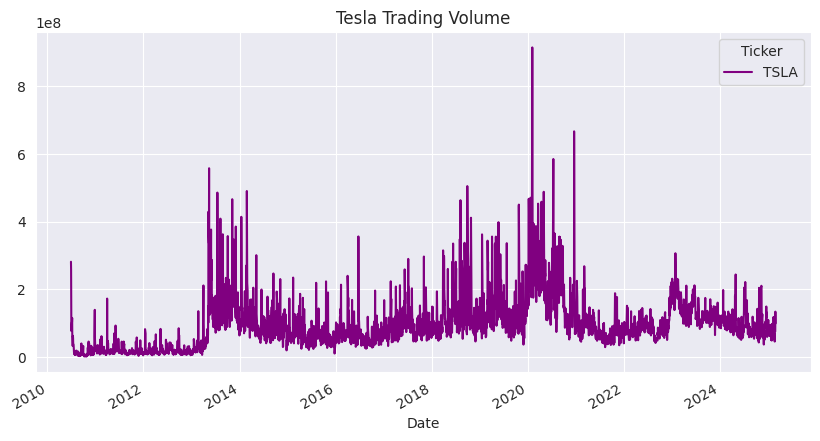

In [ ]:
# Plot Volume Over Time
df.plot(y='Volume', title='Tesla Trading Volume', figsize=(10, 5), color='purple')
plt.show()

In [ ]:
import numpy as np
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

Price,Close,High,Low,Open,Volume,LABEL
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,0
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,0
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,0
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,0
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,0


In [ ]:
import numpy as np
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

Price,Close,High,Low,Open,Volume,LABEL
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,0
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,0
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,0
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,0
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,0


# **MultiLinear Regression:**

1. Loads Tesla stock data from CSV.
2. Defines features (X) and target (y) for prediction.
3. Splits data into training (70%) and testing (30%) sets.
4. Trains a Linear Regression model using Open, High, Low, and Volume as input.
Evaluates the model using MSE (Mean Squared Error) and R² score.
5. Plots Actual vs. Predicted values to visualize the model’s performance.

Columns in dataset: MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA'),
            ( 'LABEL',     '')],
           names=['Price', 'Ticker'])
Price          Close      High       Low      Open     Volume LABEL
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA      
Date                                                               
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500     0
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500     0
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000     0
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000     0
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500     0
Columns in dataset: MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price

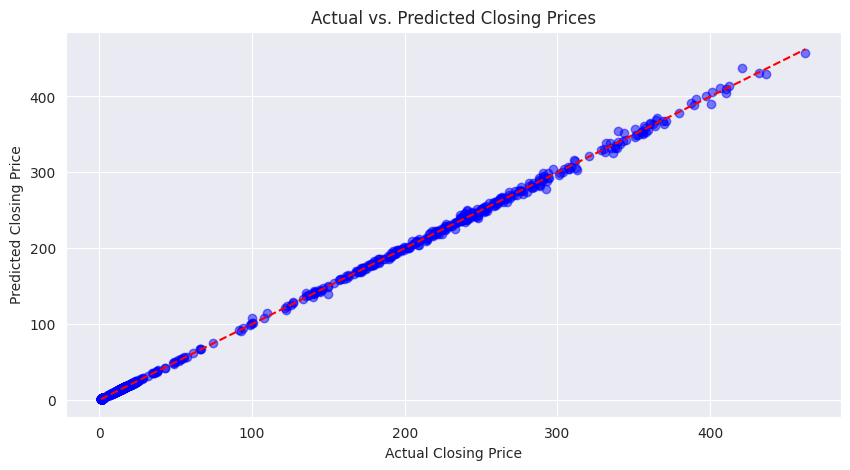

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()

# Print column names to check for unexpected ones
print("Columns in dataset:", df.columns)
print(df.head())

# Drop non-numeric columns if present
df = df.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns
df = df.dropna()  # Remove missing values
print("Columns in dataset:", df.columns)
print(df.head())


# Define Features (X) and Target (y)
X = df[['Open', 'High', 'Low', 'Volume']].values  # Independent variables
y = df['Close'].values  # Target variable (dependent variable)


# Split data into Training and Testing sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Model Performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

# Plot Actual vs. Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.show()


# **Using Neural Network: MLP (Multi Layer Perceptron)**
🔹 Steps in the Code:

1. Load and preprocess data (convert to numeric, handle missing values).
2. Split into training & testing sets (X_train, X_test, y_train, y_test).
3. Initialize and train the MLP model with 3 hidden layers ((64, 64, 64)).
4. Make predictions using predict().
5. Evaluate performance using MSE and R².
6. Plot actual vs predicted prices.

Dataset shape after preprocessing: (1261, 6)
Dataset Columns: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Train MSE: 3512796.15, R²: -249.48
Test MSE: 3725731.31, R²: -277.03


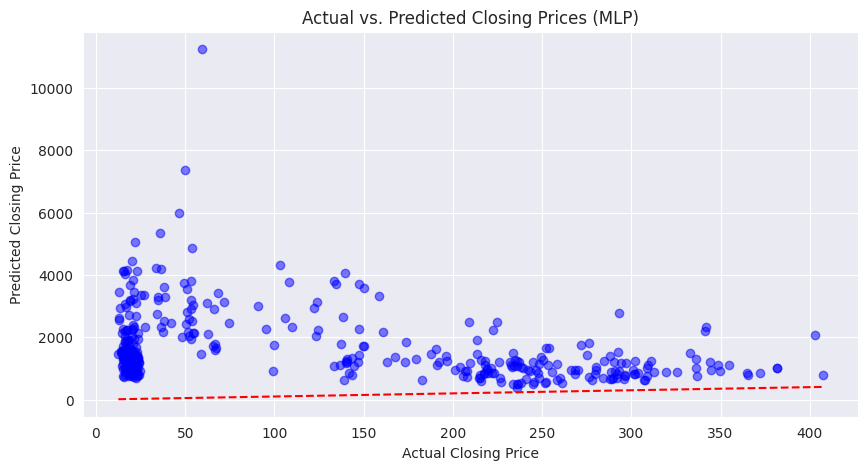

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("tesla_stock_data.csv", dtype=str)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values with column mean instead of dropping them
df.fillna(df.mean(), inplace=True)

# Debugging: Check dataset info
print("Dataset shape after preprocessing:", df.shape)
print("Dataset Columns:", df.columns)

# Define Features (X) and Target (y)
if all(col in df.columns for col in ['Open', 'High', 'Low', 'Volume', 'Close']):
    X = df[['Open', 'High', 'Low', 'Volume']].values  # Independent variables
    y = df['Close'].values  # Target variable
else:
    raise ValueError("One or more required columns are missing from the dataset!")

# Ensure dataset is not empty before splitting
if len(df) == 0:
    raise ValueError("Dataset is empty after preprocessing. Check your CSV file!")

# Split data into Training and Testing sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and Train MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make Predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Evaluate Model Performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

# Plot Actual vs. Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs. Predicted Closing Prices (MLP)")
plt.show()


## **Comparing the results of Multilinear regression and MLP**

1. Load & preprocess data (convert to numeric, handle missing values).
2. Split into train & test sets (70%-30%).
3. Train both models (Linear Regression & MLP Regressor).
4. Make predictions for both models.
5. Compare performance using MSE and R² Score.
6. Plot actual vs predicted prices for both models.
7. Display conclusion based on error metrics.

### Model Performance Comparison ###
Linear Regression - MSE: 6.17, R²: 1.00
MLP Regressor - MSE: 3725731.31, R²: -277.03


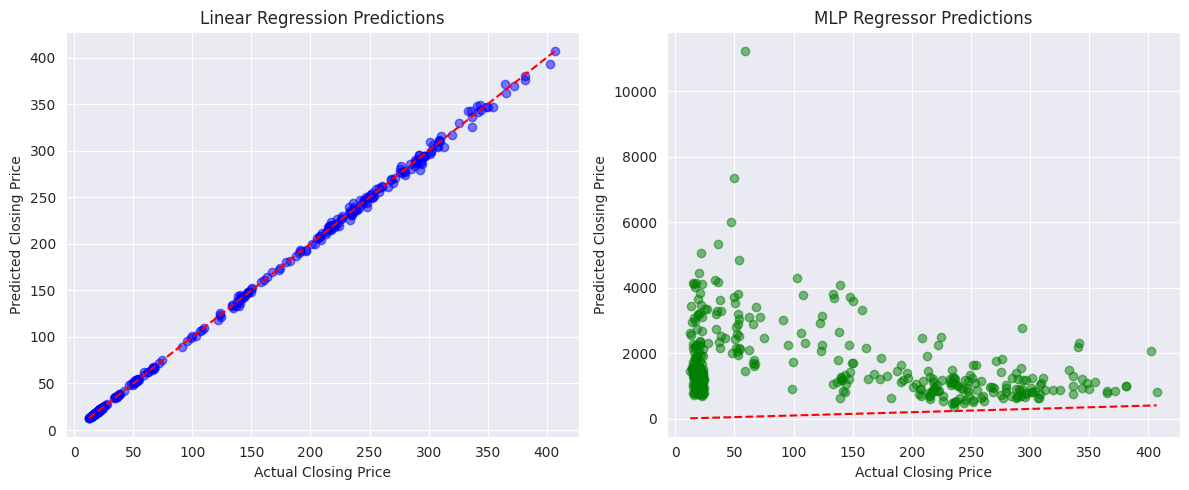


🔹 Conclusion: Linear Regression performs better with lower error.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("tesla_stock_data.csv", dtype=str)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

# Ensure dataset is not empty
if len(df) == 0:
    raise ValueError("Dataset is empty after preprocessing. Check your CSV file!")

# Define Features (X) and Target (y)
if all(col in df.columns for col in ['Open', 'High', 'Low', 'Volume', 'Close']):
    X = df[['Open', 'High', 'Low', 'Volume']].values  # Independent variables
    y = df['Close'].values  # Target variable
else:
    raise ValueError("One or more required columns are missing from the dataset!")

# Split data into Training and Testing sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_test_pred_linear = linear_model.predict(X_test)

# Train MLP Regressor Model
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_test_pred_mlp = mlp_model.predict(X_test)

# Evaluate Performance
linear_mse = mean_squared_error(y_test, y_test_pred_linear)
mlp_mse = mean_squared_error(y_test, y_test_pred_mlp)
linear_r2 = r2_score(y_test, y_test_pred_linear)
mlp_r2 = r2_score(y_test, y_test_pred_mlp)

# Print Results
print("### Model Performance Comparison ###")
print(f"Linear Regression - MSE: {linear_mse:.2f}, R²: {linear_r2:.2f}")
print(f"MLP Regressor - MSE: {mlp_mse:.2f}, R²: {mlp_r2:.2f}")

# Plot Comparison
plt.figure(figsize=(12, 5))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_linear, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Linear Regression Predictions")

# MLP Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_mlp, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("MLP Regressor Predictions")

plt.tight_layout()
plt.show()

# Conclusion
if mlp_mse < linear_mse:
    print("\n🔹 Conclusion: MLP Regressor performs better with lower error.")
else:
    print("\n🔹 Conclusion: Linear Regression performs better with lower error.")
